In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy import stats

In [3]:
# from ensemble_learning import RandomForest, accuracy
from ensemble_learning import RandomForest, accuracy, get_bias_variance_gse, get_incremental_error

In [4]:
# read data
cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_train = pd.read_csv('../data/bank/train.csv', names=cols)
df_test = pd.read_csv('../data/bank/test.csv', names=cols)

# process numeric input
medians = df_train.median()

for col in medians.index:
    df_train[col] = df_train[col].apply(lambda x: x > medians[col])
    df_test[col] = df_test[col].apply(lambda x: x > medians[col])
    
# process labels
label_dict={'yes': 1, 'no': -1}
df_train['y'] = df_train['y'].map(label_dict)
df_test['y'] = df_test['y'].map(label_dict)

In [5]:
X_train = df_train.drop('y', axis=1).values
y_train = df_train['y'].values

X_test = df_test.drop('y', axis=1).values
y_test = df_test['y'].values

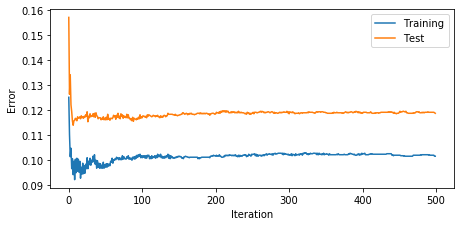


Random Forest Results T=500 sub size = 2
Training Error: 0.1016
Test Error:     0.1188


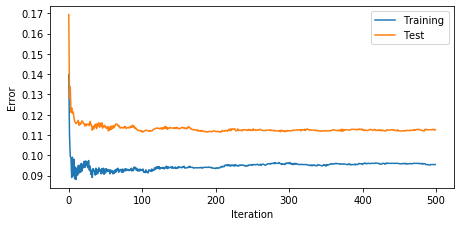


Random Forest Results T=500 sub size = 4
Training Error: 0.0954
Test Error:     0.1126


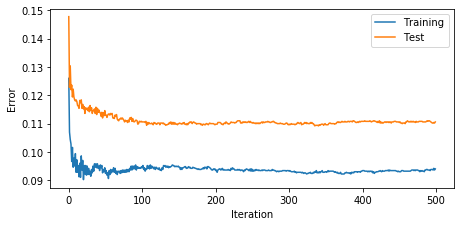


Random Forest Results T=500 sub size = 6
Training Error: 0.094
Test Error:     0.1106
Wall time: 20min 1s


In [6]:
%%time
for s in [2, 4, 6]:
    
    model = RandomForest(num_trees=500, sub_size=s)
    model.fit(X_train, y_train, m=1000)
    
    error_train = get_incremental_error(model, X_train, y_train)
    error_test = get_incremental_error(model, X_test, y_test)
    
    
    plt.figure(figsize=(6.5, 3.25))
    plt.plot(error_train, label='Training')
    plt.plot(error_test, label='Test')
    plt.ylabel('Error')
    plt.xlabel('Iteration')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'p_rf_0{s}_2.png', bbox_inchex='tight')
    plt.show()
    
    print(f'\nRandom Forest Results T=500 sub size = {s}')
    print(f"Training Error: {round(error_train[-1], 4)}")
    print(f"Test Error:     {round(error_test[-1], 4)}\n")

In [1]:
# %%time
# choices = np.arange(len(X_train))

# for i in range(100):
    
#     if i % 5 == 0:
#         print(f"beginning {i:03}")

#     # random index to subset data
#     random_idx = np.random.choice(choices, size=1000, replace=False)

#     # fit model
#     model = RandomForest(num_trees=500, sub_size=4)
#     model.fit(X_train[random_idx], y_train[random_idx])

#     # get single tree precition
#     y_pred_1 = model.trees[0].predict(X_test)

#     # get bagging prediction
#     y_pred_500 = model.predict(X_test)

#     # write results
#     results = pd.DataFrame({1: y_pred_1, 500: y_pred_500})
#     results.to_csv(f"./randomForest_results/{i:03}.csv", index=False)

In [ ]:
%%time

pred_1, pred_500 = [], []

choices = np.arange(len(X_train))

for i in range(100):

    # random index to subset data
    random_idx = np.random.choice(choices, size=1000, replace=False)

    # fit model
    model = RandomForest(num_trees=500, sub_size=4)
    model.fit(X_train[random_idx], y_train[random_idx])

    # get single tree precition
    y_pred_1 = model.trees[0].predict(X_test)

    # get bagging prediction
    y_pred_500 = model.predict(X_test)
    
    # add to lists
    pred_1.append(y_pred_1)
    pred_500.append(y_pred_500)
    
pred_1 = np.array(pred_1)
pred_500 = np.array(pred_500)

In [ ]:
bias1, var1, gse1 = get_bias_variance_gse(pred_1, y_test)
bias5, var5, gse5 = get_bias_variance_gse(pred_500, y_test)

In [ ]:
dp=5
print(f"1:   Bias: {bias1.round(dp)}, Variance: {var1.round(dp)}, GSE: {gse1.round(dp)}")
print(f"500: Bias: {bias5.round(dp)}, Variance: {var5.round(dp)}, GSE: {gse5.round(dp)}")

In [6]:
pred_1, pred_500 = [], []
files = glob.glob('./randomForest_results/*.csv')

for fl in files:
    temp = pd.read_csv(fl)
    pred_1.append(temp['1'].values)
    pred_500.append(temp['500'].values)

pred_1 = np.array(pred_1)
pred_500 = np.array(pred_500)

In [7]:
bias1, var1, gse1 = get_bias_variance_gse(pred_1, y_test)
bias5, var5, gse5 = get_bias_variance_gse(pred_500, y_test)

In [8]:
dp=5
print(f"1:   Bias: {bias1.round(dp)}, Variance: {var1.round(dp)}, GSE: {gse1.round(dp)}")
print(f"500: Bias: {bias5.round(dp)}, Variance: {var5.round(dp)}, GSE: {gse5.round(dp)}")

1:   Bias: 0.34081, Variance: 0.3225, GSE: 0.66331
500: Bias: 0.39784, Variance: 0.08948, GSE: 0.48732
